# L01 - Árbol de decisión aplicado a clientes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [20]:
file = 'CSV/Mall_Customers-2.csv'
data = pd.read_csv(file, index_col=0)
data.rename({'Gender' : 'Genero', 
           'Age' : 'Edad',
           'Annual Income (k$)': 'Ingreso', 
           'Spending Score (1-100)': 'Gasto'},  axis=1, inplace=True)
data['Segmento'] = np.where(data.Ingreso >= 90, 'Ingreso Alto', np.where(data.Ingreso < 50, 'Ingreso Bajo', 'Ingreso Moderado'))
mapping = {'Male': 0, 'Female': 1}
data['Genero'] = pd.Series(data['Genero'], index=data.index).map(mapping)
data

,Genero,Edad,Ingreso,Gasto,Segmento
CustomerID,,,,,
1,0,19,15,39,Ingreso Bajo
2,0,21,15,81,Ingreso Bajo
3,1,20,16,6,Ingreso Bajo
4,1,23,16,77,Ingreso Bajo
5,1,31,17,40,Ingreso Bajo
...,...,...,...,...,...
196,1,35,120,79,Ingreso Alto
197,1,45,126,28,Ingreso Alto
198,0,32,126,74,Ingreso Alto


In [21]:
train, test = train_test_split(data, test_size = 0.4, stratify = data['Segmento'], random_state = 20)

In [22]:
x_train=train[['Genero', 'Edad', 'Ingreso', 'Gasto']]
y_train=train['Segmento']

x_test=test[['Genero', 'Edad', 'Ingreso', 'Gasto']]
y_test=test['Segmento']

In [23]:
mod_dt = DecisionTreeClassifier(max_depth=3, random_state=1)
mod_dt.fit(x_train, y_train)
prediction = mod_dt.predict(x_test)

In [24]:
mod_dt.feature_importances_

array([0., 0., 1., 0.])

In [25]:
fn = ['Gendero', 'Edad', 'Ingreso', 'Gasto']
cn = ['Ingreso Alto', 'Ingreso Bajo', 'Ingreso Moderado']

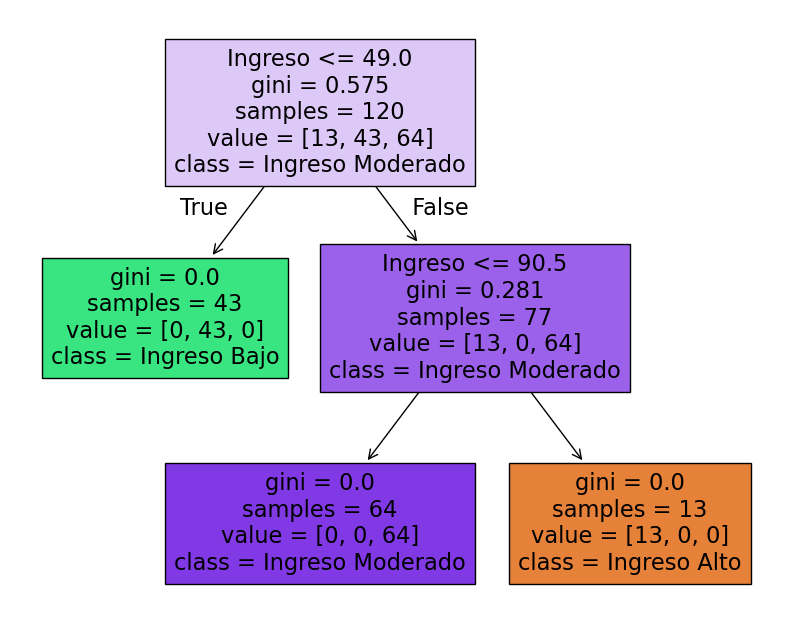

In [26]:
plt.figure(figsize=(10, 8))
plot_tree(mod_dt, feature_names=fn, class_names=cn, filled=True);

In [27]:
eficiencia = metrics.accuracy_score(y_test, prediction)

In [28]:
eficiencia

1.0